In [246]:
import pandas as pd

In [247]:
import numpy as np

In [248]:
import scipy

In [249]:
import os

In [250]:
import matplotlib.pyplot as plt

In [251]:
from matplotlib.pyplot import figure

In [252]:
import statsmodels.api as sm

In [253]:
from sklearn.linear_model import LinearRegression

In [254]:
import statsmodels.formula.api as smf

In [255]:
from statsmodels.formula.api import ols

In [256]:
from statsmodels.iolib.summary2 import summary_col

In [257]:
from linearmodels.panel import PanelOLS

In [338]:
import seaborn as sns

In [258]:
df = pd.read_csv('data.csv')
df2 = pd.DataFrame(df)

In [259]:
#removing all the regions in our dataset to avoid double counting

ban_list = ['AFE', 'MIC', 'AFW', 'ARB', 'TSS', 'TLA', 'TMN', 'TSA', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'ECA', 'ECS', 'EMU', 'WLD', 'UMC', 'SST', 'SAS', 'PSS', 'PRE', 'NAC', 'MEA', 'MNA', 'LDC', 'LIC', 'LMC', 'LMY', 'LAC', 'LCN','LTE', 'OED', 'OSS', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'EUU', 'FCS', 'HIC', 'HPC', 'PST', 'TEC', 'TEA', 'SSA', 'SSF']

In [260]:
country_only_df = df2[~df2.economy.isin(ban_list)]
#dropped non-ISO economies

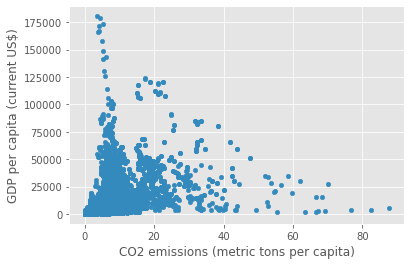

In [261]:
scatter = country_only_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [262]:
scatter.figure.savefig('initial scatter.pdf', dpi=300)

In [263]:
balanced_df = country_only_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])
#dropped na values and non-ISO economies. 

In [264]:
balanced_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
38,ABW,YR1986,NaN,NaN,NaN,2.868274,127.878602,NaN,13.8472,6.474660,NaN,NaN,NaN,0.0,6472.398709,NaN,NaN,NaN
39,ABW,YR1987,NaN,NaN,NaN,7.234613,143.941114,NaN,14.3017,8.943996,NaN,NaN,NaN,0.0,7885.158927,NaN,NaN,NaN
40,ABW,YR1988,NaN,NaN,NaN,10.027328,NaN,NaN,14.5499,11.000443,NaN,NaN,NaN,0.0,9765.909207,NaN,NaN,NaN
41,ABW,YR1989,NaN,NaN,NaN,10.634558,NaN,NaN,14.8981,11.871481,NaN,NaN,NaN,0.0,11392.269150,NaN,NaN,NaN
195,AFG,YR1970,NaN,NaN,NaN,0.149651,-679.915897,NaN,10202.0000,3042.256300,NaN,NaN,NaN,0.0,156.518771,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0000,5840.000000,NaN,NaN,NaN,0.0,1434.896277,NaN,NaN,NaN
22616,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0000,6490.000000,NaN,NaN,NaN,0.0,1445.069702,NaN,NaN,NaN
22617,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0000,6090.000000,NaN,NaN,NaN,0.0,1464.588957,133.0,NaN,NaN
22618,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0000,6280.000000,NaN,NaN,NaN,0.0,1235.189032,NaN,25.4,NaN


In [265]:
main_df = balanced_df[balanced_df['time'] >= 'YR2000']
#for the balanced df we only want from YR2000 onwards. 
             
             
             #['YR2000','YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005','YR2006', 'YR2007', 'YR2008', 'YR2009','YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016','YR2017','YR2018']]

#main_up_df = main_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])

In [266]:
#raw regressions
X = main_df['CO2 emissions (metric tons per capita)']
Y = main_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# plt.scatter(X, Y, color ="black")
# plt.plot(X, predictions, color ='green')

                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.359
Model:                                      OLS   Adj. R-squared:                  0.359
Method:                           Least Squares   F-statistic:                     3059.
Date:                          Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                                  22:07:04   Log-Likelihood:                -60377.
No. Observations:                          5457   AIC:                         1.208e+05
Df Residuals:                              5455   BIC:                         1.208e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [267]:
main_df.to_csv('main_df.csv')

In [269]:
main_up_df= main_df[main_df['CO2 emissions (metric tons per capita)'] != 0]


In [270]:
#taking logs to get more consistencies

main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/1980460622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])


In [271]:
main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/1265170634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])


                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.428e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:07:04   Log-Likelihood:                -6421.3
No. Observations:                5435   AIC:                         1.285e+04
Df Residuals:                    5433   BIC:                         1.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2741      0.060   -103.767      0.0

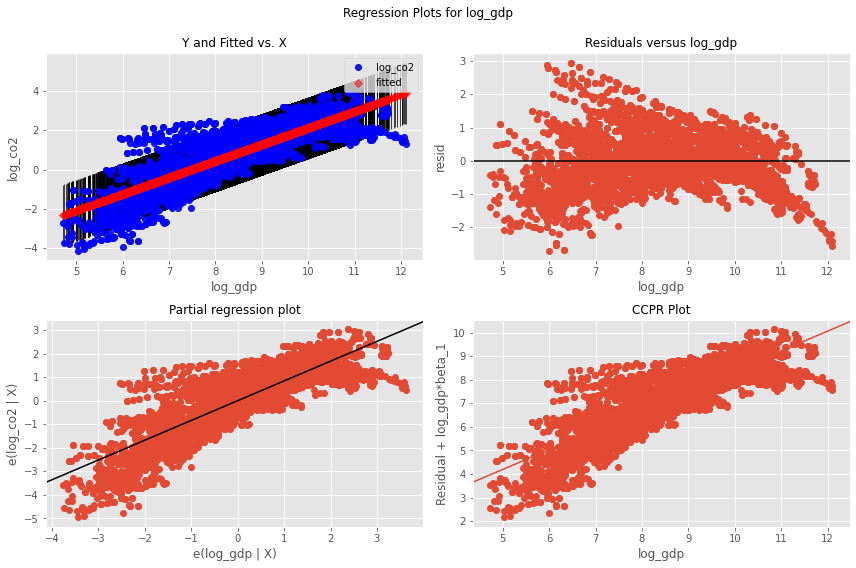

In [272]:
log_co2 = main_up_df["log_co2"].to_numpy().reshape(5435,1)
log_gdp = main_up_df["log_gdp"].to_numpy().reshape(5435,1)
model = ols('log_co2 ~ log_gdp', data=main_up_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model, 'log_gdp', fig=fig)

In [273]:
main_up_df.describe() #summary statistics

,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2
count,5435.000000,3524.000000,3616.000000,5435.000000,4693.000000,897.000000,5.435000e+03,5424.000000,897.000000,897.000000,254.000000,5314.000000,5435.000000,285.000000,2238.000000,641.000000,5435.000000,5435.000000
mean,29.239857,68.316261,2.271922,5.081704,-5745.879074,4593.753846,4.957306e+04,17558.906711,757.828651,1181.422631,1.011611,0.874770,13068.360020,84.202456,5.624084,27.119590,8.479918,0.838195
std,28.307853,28.795080,2.864850,5.847835,35870.658053,23043.516017,1.340216e+05,50218.523698,2882.816353,5406.617673,1.795234,3.608587,19326.155395,68.925793,10.300821,11.251793,1.524757,1.502497
min,0.000000,0.000000,0.054961,0.016313,-415197.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,111.927225,7.000000,0.000000,2.370000,4.717849,-4.115812
25%,5.346500,52.574422,1.764449,0.912534,-3038.418457,0.000000,3.680000e+03,1140.000000,0.000000,0.000000,0.015601,0.000000,1433.866947,29.900000,0.200000,18.400000,7.268130,-0.091529
50%,19.476500,77.198351,2.278244,3.198316,-117.269043,100.700000,1.182000e+04,4670.000000,1.000000,0.000000,0.173701,0.023595,4739.841710,61.800000,1.000000,24.800000,8.463759,1.162624
75%,47.043499,90.334130,2.686194,7.426104,561.077302,981.000000,4.063500e+04,14580.000000,267.900000,405.000000,1.044448,0.420092,16173.740050,130.700000,6.075000,33.700000,9.691144,2.004999
max,98.342903,100.000000,103.157895,47.699934,118677.593750,300896.000000,1.242150e+06,546990.000000,28055.800000,57054.000000,9.226586,68.681470,180366.715198,324.100000,77.400000,74.200000,12.102747,3.864930


229      5.145066
230      5.281635
231      5.090656
232      5.380578
233      5.499851
           ...   
22615    7.659385
22616    7.662608
22617    7.544961
22618    7.470457
22619    7.615334
Length: 5435, dtype: float64


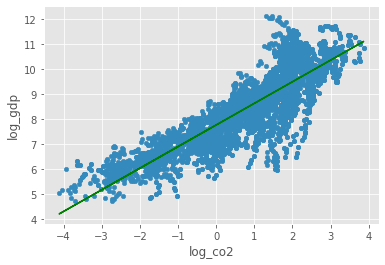

In [274]:
#scatter plot!

co2 = main_up_df["log_co2"].to_numpy().reshape(5435,1)
gdp = main_up_df["log_gdp"].to_numpy().reshape(5435,1)
model3 = LinearRegression()
model3.fit(co2, gdp)

main_up_df.plot.scatter('log_co2', 'log_gdp')
plt.plot(co2, model3.predict(co2), color ='green')
print(predictions2)




In [275]:
#main_up_df['Develop_Dummy'] = 0 if df['Salary'] < df['Salary'].median() else 1

In [276]:
#income classifications

mid_inc_countries = ['AGO', 'ALB', 'ARG', 'ARM', 'AZE', 'BEN', 'BGD', 'BGR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BTN', 'BWA', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'DJI', 'DMA', 'DOM', 'DZA', 'ECU', 'EGY', 'FJI', 'FSM', 'GAB', 'GEO', 'GHA', 'GNQ', 'GRD', 'GTM', 'GUY', 'HND', 'IDN', 'IND', 'IRN', 'IRQ', 'JAM', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'LAO', 'LBN', 'LBY', 'LCA', 'LKA', 'LSO', 'MAR', 'MDA', 'MDV', 'MEX', 'MHL', 'MRT', 'MKD', 'MYS', 'MMR', 'MNE', 'MNG', 'NGA', 'NIC', 'NPL', 'NAM', 'PAK', 'PER', 'PHL', 'PNG', 'PRY', 'PSE', 'RUS', 'STP', 'SEN', 'SLB', 'SLV', 'SRB', 'SUR', 'SWZ', 'THA', 'TUN', 'TUR', 'TUV', 'TKM', 'TLS', 'TON', 'TZA', 'UKR', 'UZB', 'VCT', 'VEN', 'VNM', 'VUT', 'WSM', 'ZAF', 'ZMB', 'ZWE']
hi_inc_countries = ['AND', 'ATG', 'AUS', 'AUT', 'BHS', 'BHR', 'ARE', 'BEL', 'BRB', 'BRN', 'CAN', 'CHE', 'CHL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LIE', 'LTU', 'LUX', 'LVA', 'MLT', 'MUS', 'NOR', 'NLD', 'NRU','NZL', 'OMN', 'PAN', 'PLW', 'POL', 'PRT', 'QAT', 'ROU', 'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'SYC', 'TTO', 'URY', 'USA']
lo_inc_countries = ['AFG', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GIN', 'GMB', 'GNB', 'HTI', 'LBR', 'MDG', 'MLI', 'MOZ', 'MWI', 'NER', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'SYR', 'TCD', 'TGO', 'TJK', 'UGA', 'YEM']


In [277]:
def middle_income_func(economy):  #dummy helper functions
    if economy in mid_inc_countries:
        return 1
    else:
        return 0

In [278]:
def low_income_func(economy):
    if economy in lo_inc_countries:
        return 1
    else:
        return 0

In [279]:
def high_income_func(economy):
    if economy in hi_inc_countries:
        return 1
    else:
        return 0

In [280]:
main_up_df['economy']

229      AFG
230      AFG
231      AFG
232      AFG
233      AFG
        ... 
22615    ZWE
22616    ZWE
22617    ZWE
22618    ZWE
22619    ZWE
Name: economy, Length: 5435, dtype: object

In [281]:
# Making the income dummies

main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/2128815270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)


In [282]:
main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/1282217178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)


In [283]:
main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/379893192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)


In [284]:
main_up_df.to_csv('dummy.csv')

In [285]:
gdp = main_up_df[["log_gdp", "Middle_dummy" , "High_dummy" ]]
co2 = main_up_df["log_co2"]
gdp= sm.add_constant(gdp)

model4 = sm.OLS(co2, gdp).fit()

print_model_4 = model4.summary()
print(print_model_4)

dfoutput = summary_col([model4],stars=True)
print(dfoutput)

dfoutput.as_latex()


                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     6228.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:07:04   Log-Likelihood:                -5873.2
No. Observations:                5435   AIC:                         1.175e+04
Df Residuals:                    5431   BIC:                         1.178e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.2329      0.079    -79.120   

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\\begin{table}\n\\caption{}\n\\label{}\n\\begin{center}\n\\begin{tabular}{ll}\n\\hline\n               & log\\_co2    \\\\\n\\hline\nconst          & -6.2329***  \\\\\n               & (0.0788)    \\\\\nlog\\_gdp       & 0.7022***   \\\\\n               & (0.0116)    \\\\\nMiddle\\_dummy  & 1.2449***   \\\\\n               & (0.0366)    \\\\\nHigh\\_dummy    & 1.2761***   \\\\\n               & (0.0552)    \\\\\nR-squared      & 0.7748      \\\\\nR-squared Adj. & 0.7747      \\\\\n\\hline\n\\end{tabular}\n\\end{center}\n\\end{table}'

In [286]:
# latex file path code 


# printable_table = summary_col(model4, stars=True, float_format = '%0.2f')
# filepath = os.path.join(r'C:/Users/Anjali/Desktop/Boston_University_GRS/Sem3_Python/Final_Project/Final Project/table4.tex')
# f = open(filepath, 'w')
# f.write(printable_table.as_latex())
# f.close 
# print(filepath)

In [287]:
def time_converter(time):
    new_time = int(time[2:])
    return new_time

In [288]:
main_up_df['time'] = main_up_df['time'].apply(time_converter)

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/4250821334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['time'] = main_up_df['time'].apply(time_converter)


In [291]:
main_up_df['Interaction_low'] =main_up_df['log_gdp'] * main_up_df['Low_dummy']

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/3707717890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_low'] =main_up_df['log_gdp'] * main_up_df['Low_dummy']


In [292]:
main_up_df['Interaction_high'] =main_up_df['log_gdp'] * main_up_df['High_dummy']

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/3951178416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_high'] =main_up_df['log_gdp'] * main_up_df['High_dummy']


In [293]:
# what if we flip our x and y and check causal implication of Kuznet's theory
X = main_up_df[["log_gdp", "Low_dummy" , "High_dummy", "Interaction_low", "Interaction_high" ]]
gdp = main_up_df["log_co2"]
X = sm.add_constant(X)

model5 = sm.OLS(gdp, X).fit()

print_model_5 = model5.summary()
print(print_model_5)

#somewhat talks about the Kuznet curve?

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     4136.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:07:05   Log-Likelihood:                -5656.5
No. Observations:                5435   AIC:                         1.132e+04
Df Residuals:                    5429   BIC:                         1.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.7416      0.110  

In [294]:
main_up_df_2018 = main_up_df[main_up_df['time']== 2018]

In [295]:
low_income_df = main_up_df_2018[main_up_df_2018['Low_dummy']==1]

In [296]:
low_income_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high
245,AFG,2018,21.422701,NaN,NaN,0.200151,NaN,NaN,81510.0,8960.0,...,NaN,NaN,NaN,6.185526,-1.608683,0,0,1,6.185526,0.0
434,AFG,2018,21.422701,NaN,NaN,0.200151,NaN,NaN,81510.0,8960.0,...,NaN,NaN,NaN,6.185526,-1.608683,0,0,1,6.185526,0.0
1524,BDI,2018,85.526901,NaN,NaN,0.052795,NaN,NaN,2140.0,2360.0,...,NaN,NaN,NaN,5.475557,-2.941346,0,0,1,5.475557,0.0
1770,BFA,2018,66.966202,NaN,NaN,0.216186,NaN,NaN,15600.0,9850.0,...,NaN,25.9,NaN,6.690222,-1.531614,0,0,1,6.690222,0.0
3085,CAF,2018,80.948502,NaN,NaN,0.070719,NaN,NaN,23200.0,32110.0,...,NaN,NaN,NaN,6.165321,-2.649045,0,0,1,6.165321,0.0
3832,COD,2018,96.383698,NaN,NaN,0.026169,NaN,NaN,38620.0,15790.0,...,NaN,NaN,NaN,6.329377,-3.643170,0,0,1,6.329377,0.0
3867,COD,2018,96.383698,NaN,NaN,0.026169,NaN,NaN,38620.0,15790.0,...,NaN,NaN,NaN,6.329377,-3.643170,0,0,1,6.329377,0.0
6386,ETH,2018,89.923103,NaN,NaN,0.149051,NaN,NaN,103110.0,52160.0,...,NaN,NaN,NaN,6.648369,-1.903467,0,0,1,6.648369,0.0
7511,GIN,2018,69.883904,NaN,NaN,0.251323,NaN,NaN,17830.0,6590.0,...,NaN,20.7,NaN,6.861828,-1.381015,0,0,1,6.861828,0.0
7584,GMB,2018,52.383598,NaN,NaN,0.249990,NaN,NaN,1700.0,400.0,...,NaN,NaN,NaN,6.596765,-1.386335,0,0,1,6.596765,0.0


In [297]:
middle_income_df = main_up_df_2018[main_up_df_2018['Middle_dummy']==1]

In [298]:
middle_income_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high
345,AGO,2018,56.785500,NaN,NaN,0.887380,NaN,NaN,35520.0,16440.0,...,NaN,38.7,NaN,8.098535,-0.119482,1,0,0,0.0,0.0
395,ALB,2018,38.266399,NaN,NaN,1.939732,NaN,NaN,3160.0,1100.0,...,NaN,0.6,49.0,8.573132,0.662550,1,0,0,0.0,0.0
534,AGO,2018,56.785500,NaN,NaN,0.887380,NaN,NaN,35520.0,16440.0,...,NaN,38.7,NaN,8.098535,-0.119482,1,0,0,0.0,0.0
584,ALB,2018,38.266399,NaN,NaN,1.939732,NaN,NaN,3160.0,1100.0,...,NaN,0.6,NaN,8.573132,0.662550,1,0,0,0.0,0.0
786,ARG,2018,10.520800,NaN,NaN,3.987234,NaN,NaN,117850.0,47930.0,...,NaN,1.3,NaN,9.375445,1.383098,1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22241,WSM,2018,36.618599,NaN,NaN,1.631588,NaN,NaN,300.0,60.0,...,NaN,NaN,NaN,8.339860,0.489553,1,0,0,0.0,0.0
22372,ZAF,2018,10.343300,NaN,NaN,7.496645,NaN,NaN,45140.0,18820.0,...,NaN,NaN,NaN,8.854393,2.014456,1,0,0,0.0,0.0
22495,ZAF,2018,10.343300,NaN,NaN,7.496645,NaN,NaN,45140.0,18820.0,...,NaN,NaN,NaN,8.854393,2.014456,1,0,0,0.0,0.0
22546,ZMB,2018,85.104599,NaN,NaN,0.446065,NaN,NaN,17870.0,14460.0,...,NaN,NaN,NaN,7.324074,-0.807290,1,0,0,0.0,0.0


In [299]:
high_income_df = main_up_df_2018[main_up_df_2018['High_dummy']==1]

In [300]:
high_income_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high
635,AND,2018,18.506001,NaN,NaN,5.973405,NaN,NaN,50.0,0.0,...,NaN,NaN,NaN,10.640459,1.787317,0,1,0,0.0,10.640459
736,ARE,2018,0.259200,NaN,NaN,20.797498,NaN,NaN,52960.0,7140.0,...,NaN,0.0,NaN,10.688287,3.034833,0,1,0,0.0,10.688287
907,ARE,2018,0.259200,NaN,NaN,20.797498,NaN,NaN,52960.0,7140.0,...,NaN,0.0,NaN,10.688287,3.034833,0,1,0,0.0,10.688287
1151,ATG,2018,0.904900,NaN,NaN,5.504663,NaN,NaN,200.0,20.0,...,NaN,NaN,NaN,9.721941,1.705596,0,1,0,0.0,9.721941
1202,AUS,2018,9.645000,NaN,NaN,15.475516,NaN,NaN,139070.0,76760.0,...,NaN,0.5,NaN,10.953973,2.739259,0,1,0,0.0,10.953973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20523,TTO,2018,0.454600,NaN,NaN,12.778440,NaN,NaN,1280.0,390.0,...,NaN,NaN,NaN,9.743193,2.547759,0,1,0,0.0,9.743193
20794,TTO,2018,0.454600,NaN,NaN,12.778440,NaN,NaN,1280.0,390.0,...,NaN,NaN,NaN,9.743193,2.547759,0,1,0,0.0,9.743193
21380,URY,2018,60.729099,NaN,NaN,1.890244,NaN,NaN,20940.0,7730.0,...,NaN,0.1,NaN,9.836485,0.636706,0,1,0,0.0,9.836485
21474,USA,2018,10.107200,NaN,NaN,15.240875,NaN,NaN,622590.0,250060.0,...,NaN,1.0,NaN,11.051912,2.723981,0,1,0,0.0,11.051912


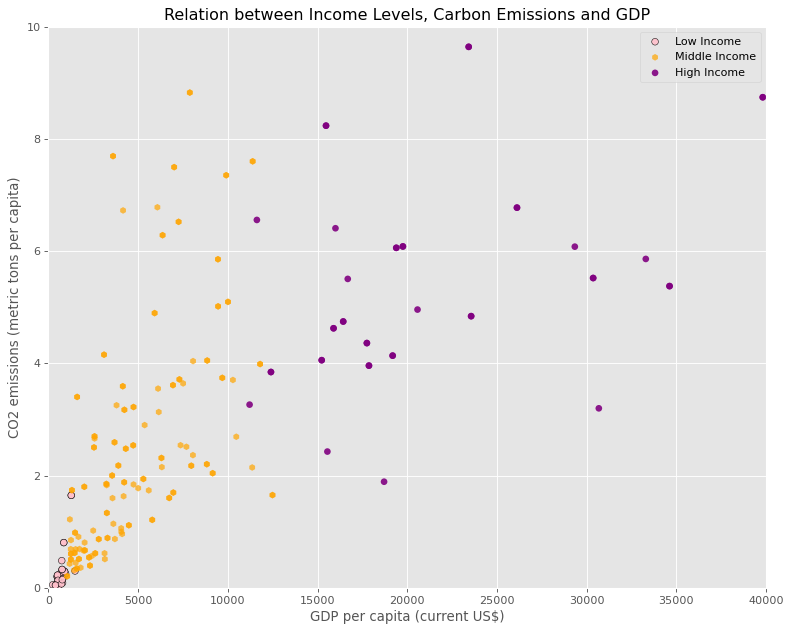

<Figure size 432x288 with 0 Axes>

In [301]:
#extension plot

color = low_income_df['Low_dummy'].apply(lambda x: 'pink')
bcolor = middle_income_df['Middle_dummy'].apply(lambda x: 'orange')
ccolor = high_income_df['High_dummy'].apply(lambda x: 'purple')
# c = ["b" if main_up_df['Low_dummy'] == 5 elif else "r" for y in y]

figure(figsize=(10, 8), dpi=80)

plt.style.use('ggplot')

plt.title('Relation between Income Levels, Carbon Emissions and GDP')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(0,40000)
plt.ylim(0,10)
plt.scatter(y=low_income_df['CO2 emissions (metric tons per capita)'],x=low_income_df['GDP per capita (current US$)'],c=color,marker='o', alpha = 0.9, edgecolors='black', label = "Low Income")
plt.scatter(y=middle_income_df['CO2 emissions (metric tons per capita)'],x=middle_income_df['GDP per capita (current US$)'],c=bcolor,marker='h', alpha = 0.7, edgecolors='none' , label = "Middle Income")
plt.scatter(y=high_income_df['CO2 emissions (metric tons per capita)'],x=high_income_df['GDP per capita (current US$)'],c=ccolor,marker='o', alpha = 0.9, edgecolors='none', label = "High Income")

plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

plt.savefig("output.png")

In [302]:
panel_df = main_up_df.dropna(subset=['Methane emissions', 'Nitrous oxide emissions', ])

In [303]:
panel_df= panel_df[panel_df['Methane emissions'] != 0]

In [304]:
panel_df= panel_df[panel_df['Nitrous oxide emissions'] != 0]

In [305]:
data = panel_df.set_index(['economy'] ,['time'])

/var/folders/bb/qzs7z40j6n3cs64qm1_5js880000gn/T/ipykernel_4889/1233393285.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  data = panel_df.set_index(['economy'] ,['time'])


In [306]:
panel_df['log_me'] = np.log(main_df['Methane emissions'])           

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [307]:
panel_df['log_nox'] = np.log(main_df['Nitrous oxide emissions'])

In [308]:
panel_df = panel_df.dropna(subset=['log_nox', 'log_me'])

In [309]:
panel_df = panel_df.dropna(subset = ['time'])

In [310]:
panel_df['year'] = pd.to_datetime(panel_df['time'], format='%Y')

In [311]:
# panel_df = panel_df.set_index('year', append=True)

In [312]:
# panel_df.index = panel_df.index.swaplevel(0,1)

In [313]:
panel_df = panel_df[panel_df['time'] >= 2000]

In [314]:
panel_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,...,log_gdp,log_co2,Middle_dummy,High_dummy,Low_dummy,Interaction_low,Interaction_high,log_me,log_nox,year
229,AFG,2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,...,5.189766,-3.022674,0,0,1,5.189766,0.0,9.322776,8.216088,2002-01-01
230,AFG,2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,...,5.250617,-2.864563,0,0,1,5.250617,0.0,9.348362,8.253228,2003-01-01
231,AFG,2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,...,5.353667,-3.085666,0,0,1,5.353667,0.0,9.346618,8.245384,2004-01-01
232,AFG,2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,...,5.489067,-2.750014,0,0,1,5.489067,0.0,9.364777,8.286521,2005-01-01
233,AFG,2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,...,5.574940,-2.611927,0,0,1,5.574940,0.0,9.608445,8.308938,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,ZWE,2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,...,7.268848,-0.111763,1,0,0,0.000000,0.0,9.289152,8.672486,2014-01-01
22616,ZWE,2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,...,7.275913,-0.108033,1,0,0,0.000000,0.0,9.375007,8.778018,2015-01-01
22617,ZWE,2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,...,7.289330,-0.244236,1,0,0,0.000000,0.0,9.339613,8.714403,2016-01-01
22618,ZWE,2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,...,7.118979,-0.330491,1,0,0,0.000000,0.0,9.355306,8.745125,2017-01-01


In [315]:
panel_df = panel_df.set_index(['economy' ,'year'])

In [316]:
#panel regression
exog_vars = panel_df[["log_co2", "log_me", "log_nox"]]
end = panel_df['log_gdp']
exog = sm.add_constant(exog_vars)
model5 = PanelOLS(end, exog, entity_effects=True, time_effects = True)
fe_res = model5.fit()
print(fe_res)

/Users/eileenzhang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                          PanelOLS Estimation Summary                           
Dep. Variable:                log_gdp   R-squared:                        0.2108
Estimator:                   PanelOLS   R-squared (Between):              0.2334
No. Observations:                5321   R-squared (Within):               0.2198
Date:                Sat, May 07 2022   R-squared (Overall):              0.2536
Time:                        22:07:05   Log-likelihood                    629.25
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      455.41
Entities:                         185   P-value                           0.0000
Avg Obs:                       28.762   Distribution:                  F(3,5115)
Min Obs:                       3.0000                                           
Max Obs:                       38.000   F-statistic (robust):             455.41
                            

In [317]:
print(panel_df)

                    time  Renewable energy consumption  \
economy year                                             
AFG     2002-01-01  2002                     43.771198   
        2003-01-01  2003                     42.276100   
        2004-01-01  2004                     49.843201   
        2005-01-01  2005                     40.859200   
        2006-01-01  2006                     37.137299   
...                  ...                           ...   
ZWE     2014-01-01  2014                     80.775002   
        2015-01-01  2015                     81.427200   
        2016-01-01  2016                     82.792603   
        2017-01-01  2017                     83.492996   
        2018-01-01  2018                     81.363602   

                    Fossil fuel energy consumption  CO2 intensity  \
economy year                                                        
AFG     2002-01-01                             NaN            NaN   
        2003-01-01                    

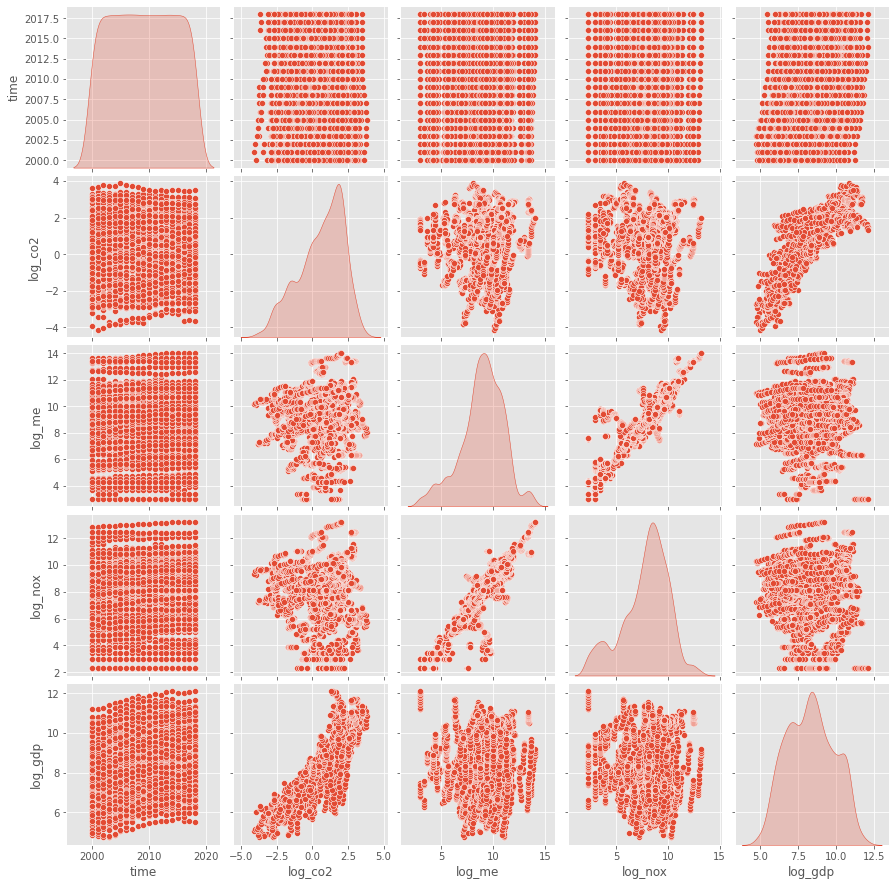

In [374]:
#sns.pairplot(panel_df['time'], panel_df['log_co2'], panel_df['log_gdp'], panel_df['log_me'], panel_df['log_nox'])
panel_df = panel_df[~panel_df.index.duplicated(keep='first')]
gas_df = panel_df[['time','log_co2', 'log_me', 'log_nox', 'log_gdp']]
gas_df = gas_df[~gas_df.index.duplicated(keep='first')]
#gas_df
#sns.histplot(panel_df.log_me, kde=True)
#plt.show()

#sns.histplot(panel_df.log_co2, kde = True)
#plt.show()

#sns.histplot(panel_df.log_nox, kde = True)
#plt.show()

sns.pairplot(gas_df, diag_kind= 'kde')


In [318]:
#Panel Data output

print(fe_res.summary.as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      log\_gdp      & \textbf{  R-squared:         }   &      0.2108      \\
\textbf{Estimator:}        &      PanelOLS      & \textbf{  R-squared (Between):}  &      0.2334      \\
\textbf{No. Observations:} &        5321        & \textbf{  R-squared (Within):}   &      0.2198      \\
\textbf{Date:}             &  Sat, May 07 2022  & \textbf{  R-squared (Overall):}  &      0.2536      \\
\textbf{Time:}             &      22:07:05      & \textbf{  Log-likelihood     }   &      629.25      \\
\textbf{Cov. Estimator:}   &     Unadjusted     & \textbf{                     }   &                  \\
\textbf{}                  &                    & \textbf{  F-statistic:       }   &      455.41      \\
\textbf{Entities:}         &        185         & \textbf{  P-value            }   &      0.0000      \\
\textbf{Avg Obs:}          &       28.762       & \textbf{  Distribution:      }   &    F(3,5115)     \\
\textbf{M